<!-- O plano e fazer a extracao exclusiva da elite. Quero reaproveitar o que peguei de todos e juntar com o que ja tenho da elite.

Depois, vou pegar o grupo de pessoas da elite que nao foram contempladas e dividir nos grupos de “precisa contemplar” e “incontemplaveis” (aqueles que ja deram erro porque nao existem ou porque ha zero tweets nas datas propostas). 

✅✅✅

-->

In [1]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

### Bios

#### Dados

In [2]:
# bios, pontos ideais e classificacoes de fatia

# bios
influencers = pd.read_csv('influencers_bio.csv')
influencers['nome_usuario'] = '@' + influencers['nome']

# pontos ideais + outras infos
influencers_infos = pd.read_csv('influencers_pontos_ideais_all_info.csv').drop(columns=['Id', 'Label', 'timeset', 'bio', 
                                                                                        'intersec1', 'intersec1_str', 
                                                                                        'intersec2', 'intersec2_str', 
                                                                                        'intersec3', 'intersec3_str']).sort_values('no')

influencers_infos = influencers.drop(columns=['nome', 'localização']).merge(
    influencers_infos.drop(columns=['no']),
    on='nome_usuario',
    how='right')

# classificacoes especificas
influencers_infos.loc[influencers_infos['ponto_ideal'] >= 1.5, 'ideology_classification'] = 'antifeminista extrema'
influencers_infos.loc[(influencers_infos['ponto_ideal'] >= 1) & (influencers_infos['ponto_ideal'] < 1.5), 'ideology_classification'] = 'antifeminista moderada'
influencers_infos.loc[(influencers_infos['ponto_ideal'] >= 0.5) & (influencers_infos['ponto_ideal'] < 1), 'ideology_classification'] = 'antifeminista centro'
influencers_infos.loc[(influencers_infos['ponto_ideal'] > -0.5) & (influencers_infos['ponto_ideal'] < 0.5), 'ideology_classification'] = 'centro'
influencers_infos.loc[(influencers_infos['ponto_ideal'] <= -0.5) & (influencers_infos['ponto_ideal'] > -1), 'ideology_classification'] = 'feminista centro'
influencers_infos.loc[(influencers_infos['ponto_ideal'] <= -1) & (influencers_infos['ponto_ideal'] > -1.5), 'ideology_classification'] = 'feminista moderada'
influencers_infos.loc[influencers_infos['ponto_ideal'] <= -1.5, 'ideology_classification'] = 'feminista extrema'

# classificacoes gerais
influencers_infos.loc[influencers_infos['ponto_ideal'] >= 0.5, 'ideology_classification_gen'] = 'antifeminista'
influencers_infos.loc[influencers_infos['ponto_ideal'] <= -0.5, 'ideology_classification_gen'] = 'feminista'
influencers_infos.ideology_classification_gen.fillna('centro', inplace=True)

influencers_infos.head()

id                                   original classificacao  \
0  2.680011e+08    data/followers_lists/transcurecer.rdata     Feminista   
1  1.832345e+08      data/followers_lists/natalyneri.rdata     Feminista   
2  1.123285e+18     data/followers_lists/Tdetravesti.rdata     Feminista   
3  8.088272e+17  data/followers_lists/linndaquebrada.rdata     Feminista   
4  2.129546e+08   data/followers_lists/TatiNefertari.rdata     Feminista   

                                                 bio  \
0  Embaixadora: @oboticario | Streamer on Twitch ...   
1  Cientista social em formação (já formei mas et...   
2  Travesti. Mestranda em Educação na USP. Pedago...   
3                                                NaN   
4  Pedagogia - USP, ajuda a construir a Bibliotec...   

                                           key words     nome_usuario  \
0                              embaixadora, streamer    @transcurecer   
1     cientista social, vegana, criadora de conteúdo      @natalyneri   
2  travesti, mestranda, educação, pedagogia, gêne...     @Tdetravesti   
3                                                NaN  @linndaquebrada   
4                                          pedagogia   @TatiNefertari   

               nome  pessoa  genero  20210215_seguidores  ...  puc  puc_str  \
0      Sher Machado       1       1                33671  ...    0  Não PUC   
1       Nátaly Neri       1       1               279978  ...    0  Não PUC   
2          Ana Flor       1       1                45542  ...    0  Não PUC   
3  Linn da Quebrada       1       1               154413  ...    0  Não PUC   
4    Tati Nefertari       1       1                83233  ...    0  Não PUC   

  estadual   estadual_str militar  militar_str  nome_usuario_raw  \
0        0  Não Estaduais       0  Não Militar      transcurecer   
1        0  Não Estaduais       0  Não Militar        natalyneri   
2        0  Não Estaduais       0  Não Militar       Tdetravesti   
3        0  Não Estaduais       0  Não Militar    linndaquebrada   
4        1      Estaduais       0  Não Militar     TatiNefertari   

   seguidores_analisados ideology_classification ideology_classification_gen  
0                   4542       feminista extrema                   feminista  
1                  30836       feminista extrema                   feminista  
2                   6384       feminista extrema                   feminista  
3                  20689       feminista extrema                   feminista  
4                  11523       feminista extrema                   feminista  

[5 rows x 59 columns]

In [3]:
# referencia para elite

influencers_infos.to_csv('influencers_referencia.csv')

In [4]:
test = pd.read_csv('influencers_pontos_ideais_all_info.csv')
test[test['Id'] == 'gabriolaz']['bio'][84]

'Quando não tô triste tô com raiva. Mãe da ...'

In [5]:
influencers_infos.ponto_ideal.min()

-2.490515

In [6]:
influencers_infos.ponto_ideal.max()

1.83152

In [7]:
influencers_infos.groupby('ideology_classification').nome_usuario.nunique()/influencers_infos.nome_usuario.nunique()*100

ideology_classification
antifeminista centro       7.608696
antifeminista extrema     17.934783
antifeminista moderada    22.282609
centro                     5.978261
feminista centro           0.543478
feminista extrema         27.717391
feminista moderada        17.934783
Name: nome_usuario, dtype: float64

In [8]:
influencers_infos.columns

Index(['id', 'original', 'classificacao', 'bio', 'key words', 'nome_usuario',
       'nome', 'pessoa', 'genero', '20210215_seguidores', 'tam_rel_seguidores',
       'ponto_ideal', 'estado', 'afiliacao', 'universidades', 'partido',
       'saido', 'suspenso', 'posicao', 'profissoes', 'genero_str', 'art_prod',
       'polit_militan', 'jor_com', 'jus', 'mid', 'part_col', 'polic_militar',
       'prof', 'saude', 'ciencia', 'emp', 'rel', 'out', 'art_prod_str',
       'polit_militan_str', 'jor_com_str', 'jus_str', 'mid_str',
       'part_col_str', 'polic_militar_str', 'prof_str', 'saude_str',
       'ciencia_str', 'emp_str', 'rel_str', 'out_str', 'federal',
       'federal_str', 'puc', 'puc_str', 'estadual', 'estadual_str', 'militar',
       'militar_str', 'nome_usuario_raw', 'seguidores_analisados',
       'ideology_classification', 'ideology_classification_gen'],
      dtype='object')

In [9]:
def converter_escala(valor, escala_maxima=3.04):
    valor_convertido = (valor / escala_maxima) * 10
    return round(valor_convertido, 1)


influencers_group = influencers_infos.groupby('ideology_classification').nome_usuario.unique()['feminista centro']
influencers_group = influencers_infos[influencers_infos['nome_usuario'].isin(influencers_group)][['nome_usuario', 'ponto_ideal', '20210215_seguidores']].sort_values(by='ponto_ideal', ascending=True)

influencers_group['ponto_ideal'] = influencers_group['ponto_ideal'].apply(converter_escala)*-1

influencers_group[influencers_group['ponto_ideal'] <= 5.9]

nome_usuario  ponto_ideal  20210215_seguidores
84  @monicabergamo          3.0              1621947

#### Analise

In [10]:
influencers_infos['ideology_classification_old'] = influencers_infos['ideology_classification']

influencers_infos['ideology_classification'].replace({'feminista extrema': 'ext. isol. cluster feminista', 
                                                     'feminista moderada': 'mod. isol. cluster feminista', 
                                                     'feminista centro': 'pou. isol. cluster feminista',
                                                     'centro': 'não isolado', 
                                                     'antifeminista centro': 'pou. isol. cluster antifeminista', 
                                                     'antifeminista moderada': 'mod. isol. cluster antifeminista',
                                                     'antifeminista extrema': 'ext. isol. cluster antifeminista'},
                                                     inplace=True
                                                     )

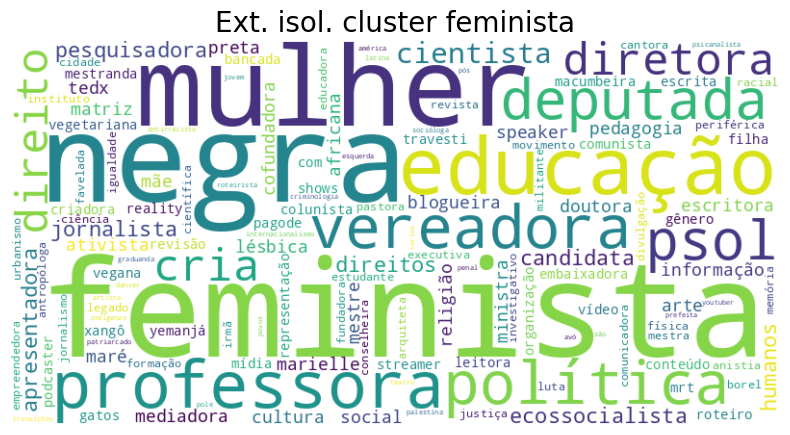

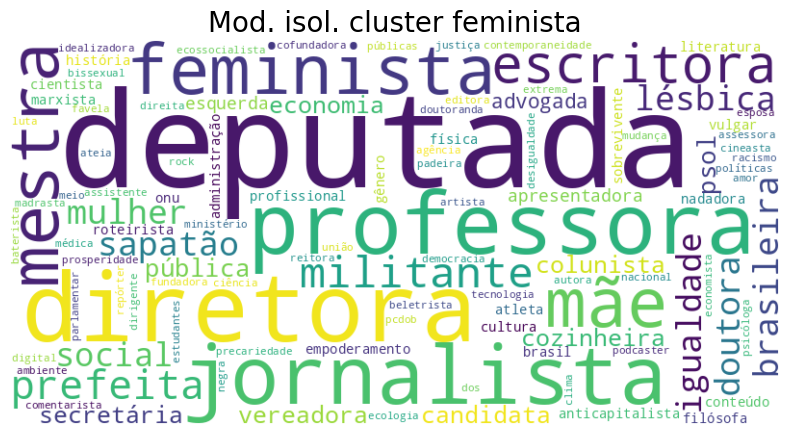

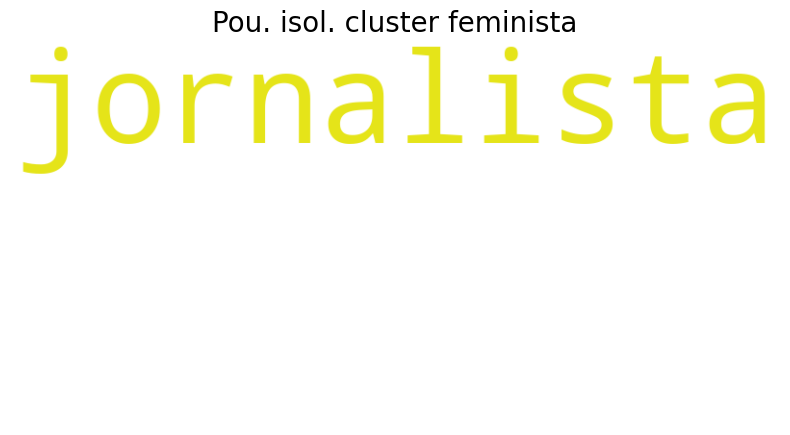

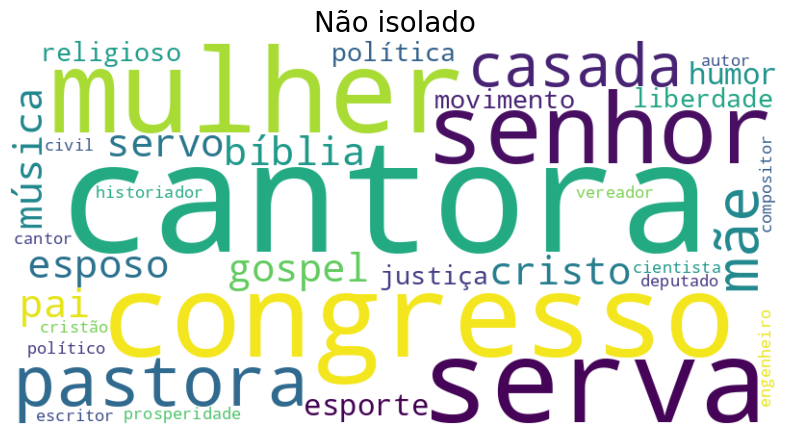

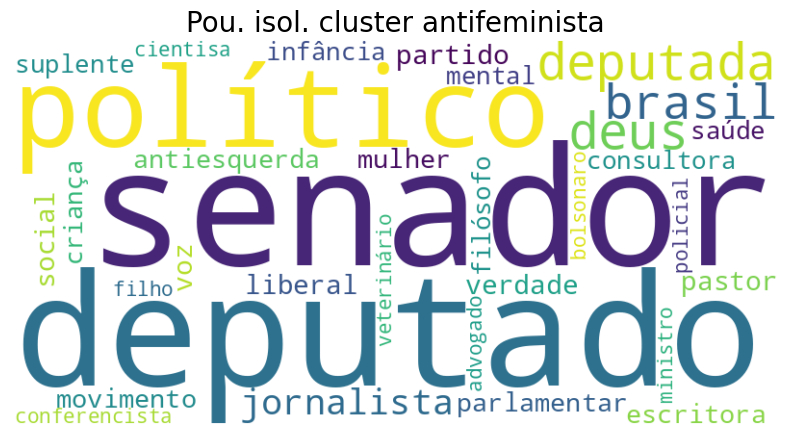

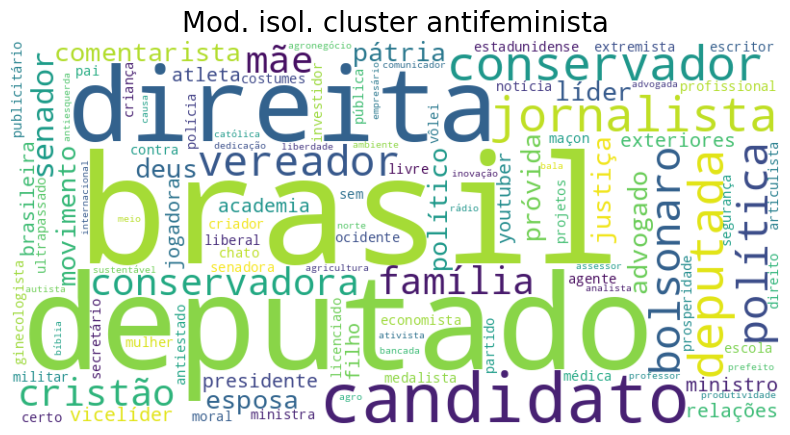

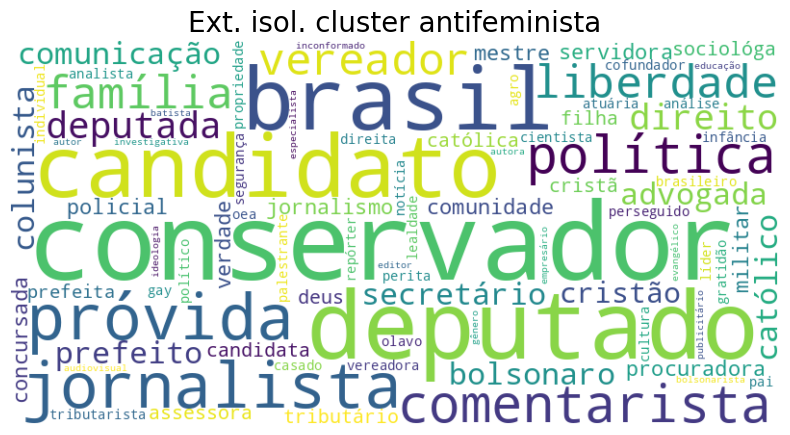

In [11]:
# Word Cloud

from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re

# Limpar e preparar a coluna 'key words'
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\b\w{1,2}\b', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'[^\w\s]', '', text)
    return text

influencers_infos['key_words_clean'] = influencers_infos['key words'].fillna('').apply(clean_text)

# Contar a frequência das palavras para cada classificação ideológica
word_counts = {}
for ideology in influencers_infos['ideology_classification'].unique():
    text = ' '.join(influencers_infos[influencers_infos['ideology_classification'] == ideology]['key_words_clean'])
    word_counts[ideology] = Counter(text.split())

# Função para gerar word cloud
def generate_wordcloud(words, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(words))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=20)
    plt.axis('off')
    plt.show()

# Gerar Word Cloud para cada ideologia
for ideology, words in word_counts.items():
    generate_wordcloud(words, f"{str.capitalize(ideology)}")


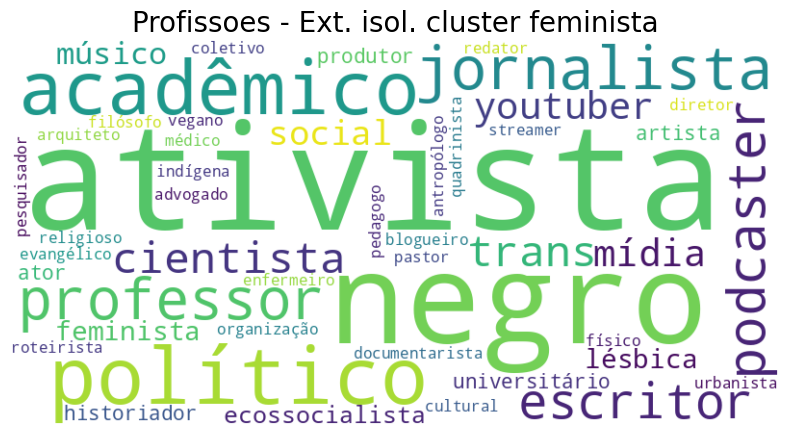

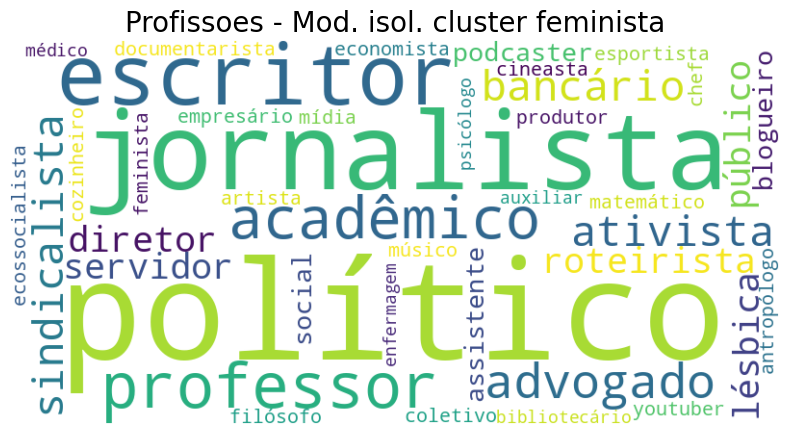

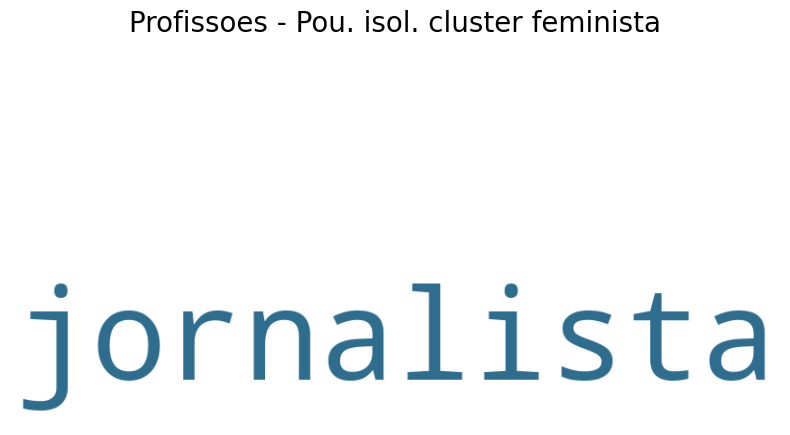

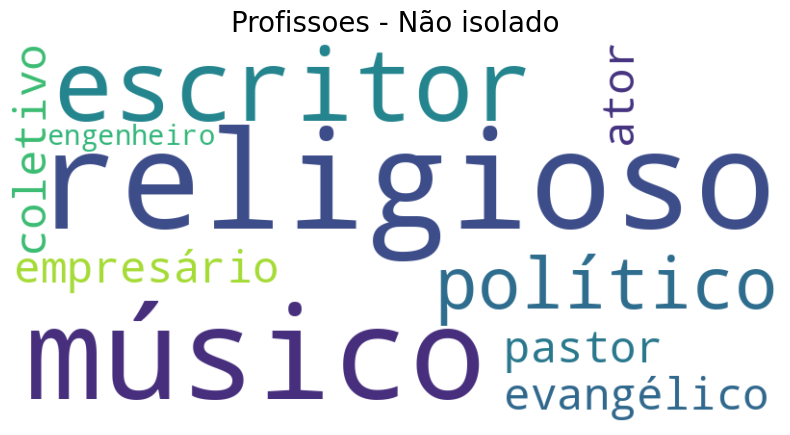

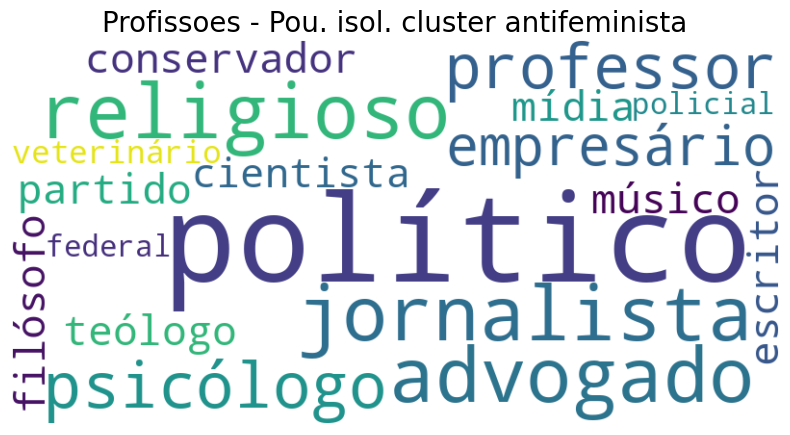

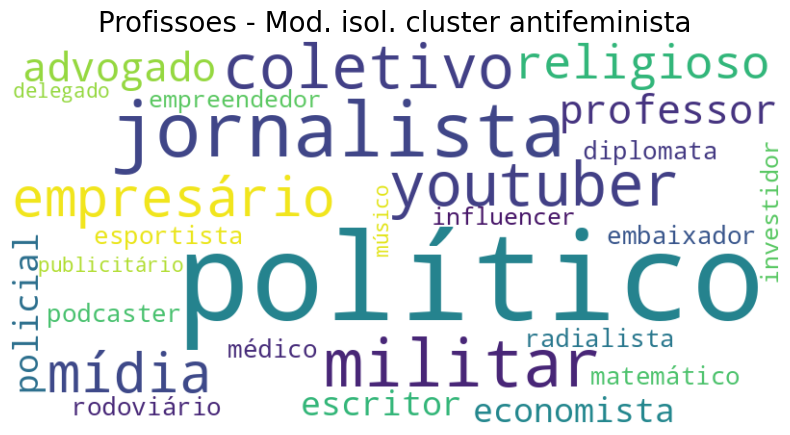

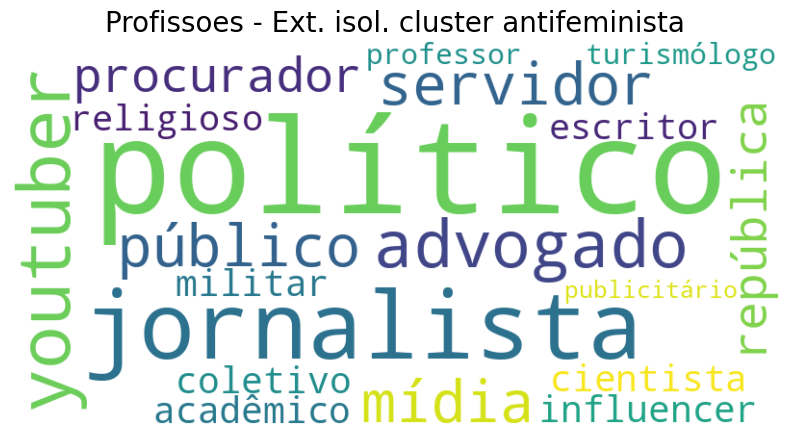

In [12]:
# Word Cloud - profissoes

from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re

# Limpar e preparar a coluna 'key words'
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\b\w{1,2}\b', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'[^\w\s]', '', text)
    return text

influencers_infos['profissoes_clean'] = influencers_infos['profissoes'].fillna('').apply(clean_text)

# Contar a frequência das palavras para cada classificação ideológica
word_counts = {}
for ideology in influencers_infos['ideology_classification'].unique():
    text = ' '.join(influencers_infos[influencers_infos['ideology_classification'] == ideology]['profissoes_clean'])
    word_counts[ideology] = Counter(text.split())

# Função para gerar word cloud
def generate_wordcloud(words, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(words))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=20)
    plt.axis('off')
    plt.show()

# Gerar Word Cloud para cada ideologia
for ideology, words in word_counts.items():
    generate_wordcloud(words, f"Profissoes - {str.capitalize(ideology)}")


In [13]:
# Top 5 palavras de cada faixa

import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

common_words = {ideology: counts.most_common(5) for ideology, counts in word_counts.items()}

# Transformar o dicionário em um DataFrame
rows = []
for ideology, words in common_words.items():
    for word, freq in words:
        rows.append({'ideology': ideology, 'word': word, 'frequency': freq})

df = pd.DataFrame(rows)

# Criar subplots para cada ideologia
ideologies = df['ideology'].unique()
fig = make_subplots(rows=2, cols=4, subplot_titles=ideologies, vertical_spacing=0.3)

# Adicionar um lollipop chart para cada ideologia, ordenando as palavras por frequência crescente
for i, ideology in enumerate(ideologies):
    subset = df[df['ideology'] == ideology].sort_values(by='frequency', ascending=True)
    row = i // 4 + 1
    col = i % 4 + 1
    fig.add_trace(
        go.Scatter(x=subset['word'], y=subset['frequency'],
                   mode='markers+lines',
                   line=dict(color='gray', width=1),
                   marker=dict(color='blue', size=8),
                   name=ideology),
        row=row, col=col
    )

# Atualizar layout do gráfico e definir limites dos eixos Y
fig.update_layout(
    height=800, width=1200,
    title_text="Top 5 Palavras por Faixa Ideológica",
    showlegend=False
)

# Definir os limites dos eixos Y para todos os subplots
fig.update_yaxes(range=[0, 15], title_text="Frequência")
fig.update_xaxes(title_text="Palavras")

# Mostrar o gráfico
fig.show()


In [14]:
ideologies = df['ideology'].unique()

ideologies_ordered = ['ext. isol. cluster feminista',
                       'mod. isol. cluster feminista',
                       'pou. isol. cluster feminista', 
                       'não isolado',
                       'pou. isol. cluster antifeminista',
                       'mod. isol. cluster antifeminista',
                       'ext. isol. cluster antifeminista']

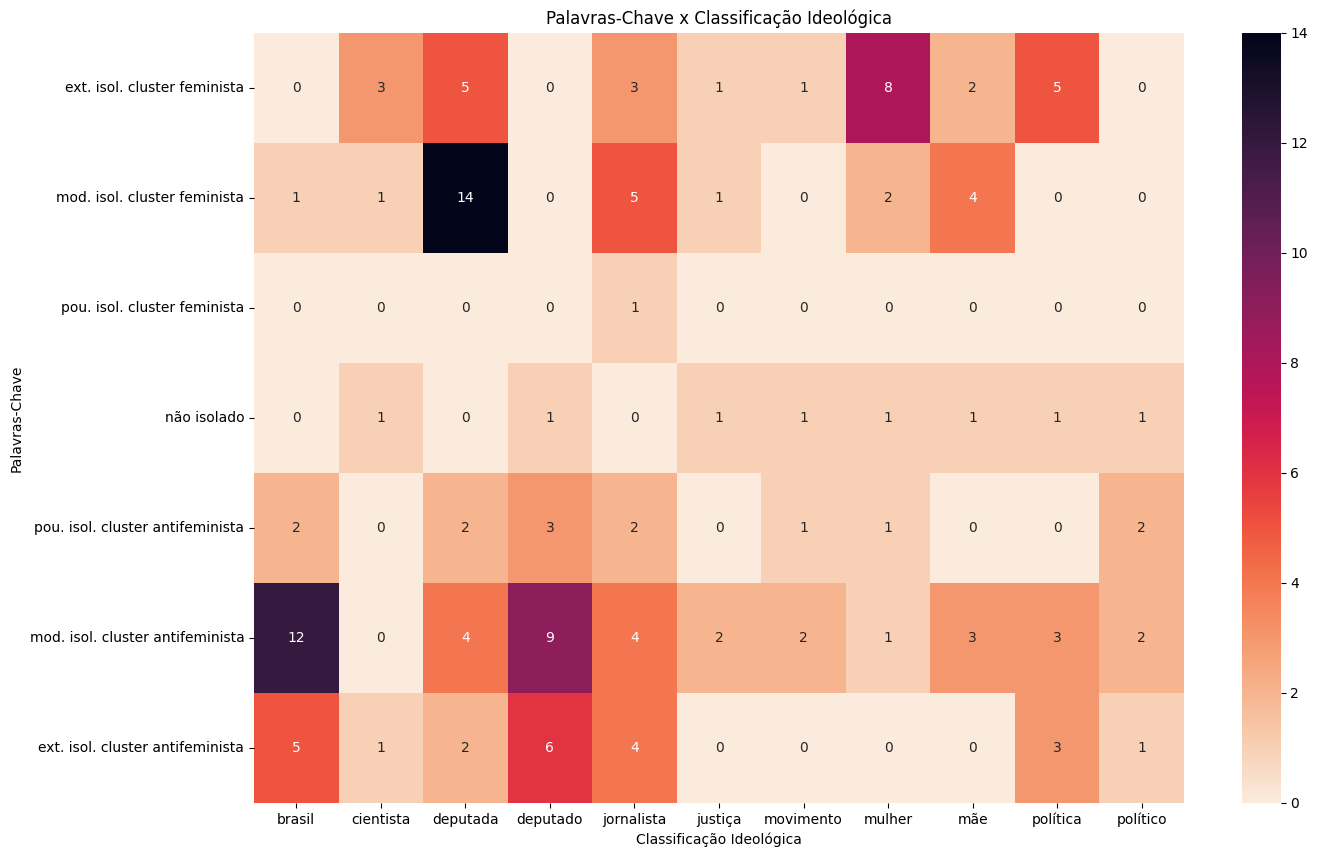

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Passo 1: Vetorizar as palavras-chave
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(influencers_infos['key_words_clean'].fillna(''))

# Passo 2: Criar um DataFrame das palavras-chave com as ideologias como índice
keywords_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out(), index=influencers_infos['ideology_classification'])

# Passo 3: Agrupar as frequências das palavras-chave por ideologia
keywords_by_ideology = keywords_df.groupby('ideology_classification').sum()

# Passo 4: Filtrar palavras-chave que aparecem em pelo menos um determinado número de registros
min_occurrence = 4
keywords_filtered = keywords_by_ideology.loc[:, (keywords_by_ideology > 0).sum(axis=0) >= min_occurrence]

# Passo 5: Reordenar o DataFrame pelo índice de ideologias na sequência específica
ideologies_ordered = ['ext. isol. cluster feminista',
                       'mod. isol. cluster feminista',
                       'pou. isol. cluster feminista', 
                       'não isolado',
                       'pou. isol. cluster antifeminista',
                       'mod. isol. cluster antifeminista',
                       'ext. isol. cluster antifeminista']

# Verificar se todas as ideologias da lista estão presentes no DataFrame
if all(ideology in keywords_filtered.index for ideology in ideologies_ordered):
    keywords_filtered = keywords_filtered.reindex(ideologies_ordered)
    
    # Verificar se a matriz não está vazia antes de criar o heatmap
    if not keywords_filtered.empty:
        # Passo 6: Criar um heatmap para visualizar a distribuição das palavras-chave por ideologia
        plt.figure(figsize=(15, 10))
        sns.heatmap(keywords_filtered, cmap="rocket_r", annot=True, fmt="d")
        plt.title("Palavras-Chave x Classificação Ideológica")
        plt.xlabel("Classificação Ideológica")
        plt.ylabel("Palavras-Chave")
        plt.show()
    else:
        print("Nenhuma palavra-chave suficiente para criar o heatmap após a filtragem.")
else:
    print("Algumas ideologias na lista de ordenação não estão presentes no DataFrame.")


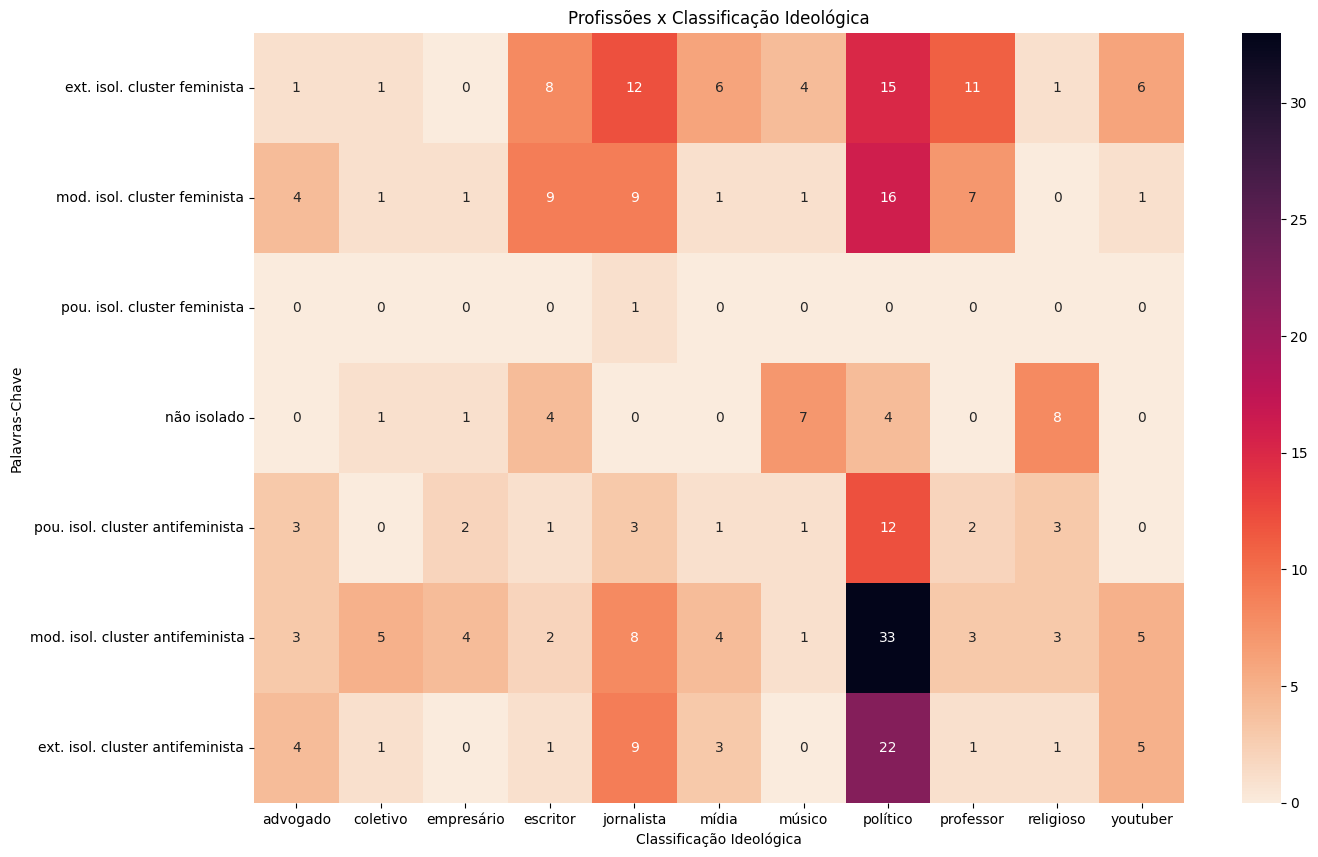

In [16]:
# Palavras-Chave x Classificação Ideológica

from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

influencers_infos['profissoes_clean'] = influencers_infos['profissoes'].fillna('').apply(clean_text)

# Passo 1: Vetorizar as palavras-chave
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(influencers_infos['profissoes_clean'].fillna(''))

# Passo 2: Criar um DataFrame das palavras-chave com as ideologias como índice
keywords_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out(), index=influencers_infos['ideology_classification'])

# Passo 3: Agrupar as frequências das palavras-chave por ideologia
keywords_by_ideology = keywords_df.groupby('ideology_classification').sum()

# Passo 4: Filtrar palavras-chave que aparecem em pelo menos um determinado número de registros
min_occurrence = 4
keywords_filtered = keywords_by_ideology.loc[:, (keywords_by_ideology > 0).sum(axis=0) >= min_occurrence]

# Passo 5: Reordenar o DataFrame pelo índice de ideologias na sequência específica
ideologies_ordered = ['ext. isol. cluster feminista',
                       'mod. isol. cluster feminista',
                       'pou. isol. cluster feminista', 
                       'não isolado',
                       'pou. isol. cluster antifeminista',
                       'mod. isol. cluster antifeminista',
                       'ext. isol. cluster antifeminista']

# Verificar se todas as ideologias da lista estão presentes no DataFrame
if all(ideology in keywords_filtered.index for ideology in ideologies_ordered):
    keywords_filtered = keywords_filtered.reindex(ideologies_ordered)
    
    # Verificar se a matriz não está vazia antes de criar o heatmap
    if not keywords_filtered.empty:
        # Passo 6: Criar um heatmap para visualizar a distribuição das palavras-chave por ideologia
        plt.figure(figsize=(15, 10))
        sns.heatmap(keywords_filtered, cmap="rocket_r", annot=True, fmt="d")
        plt.title("Profissões x Classificação Ideológica")
        plt.xlabel("Classificação Ideológica")
        plt.ylabel("Palavras-Chave")
        plt.show()
    else:
        print("Nenhuma palavra-chave suficiente para criar o heatmap após a filtragem.")
else:
    print("Algumas ideologias na lista de ordenação não estão presentes no DataFrame.")



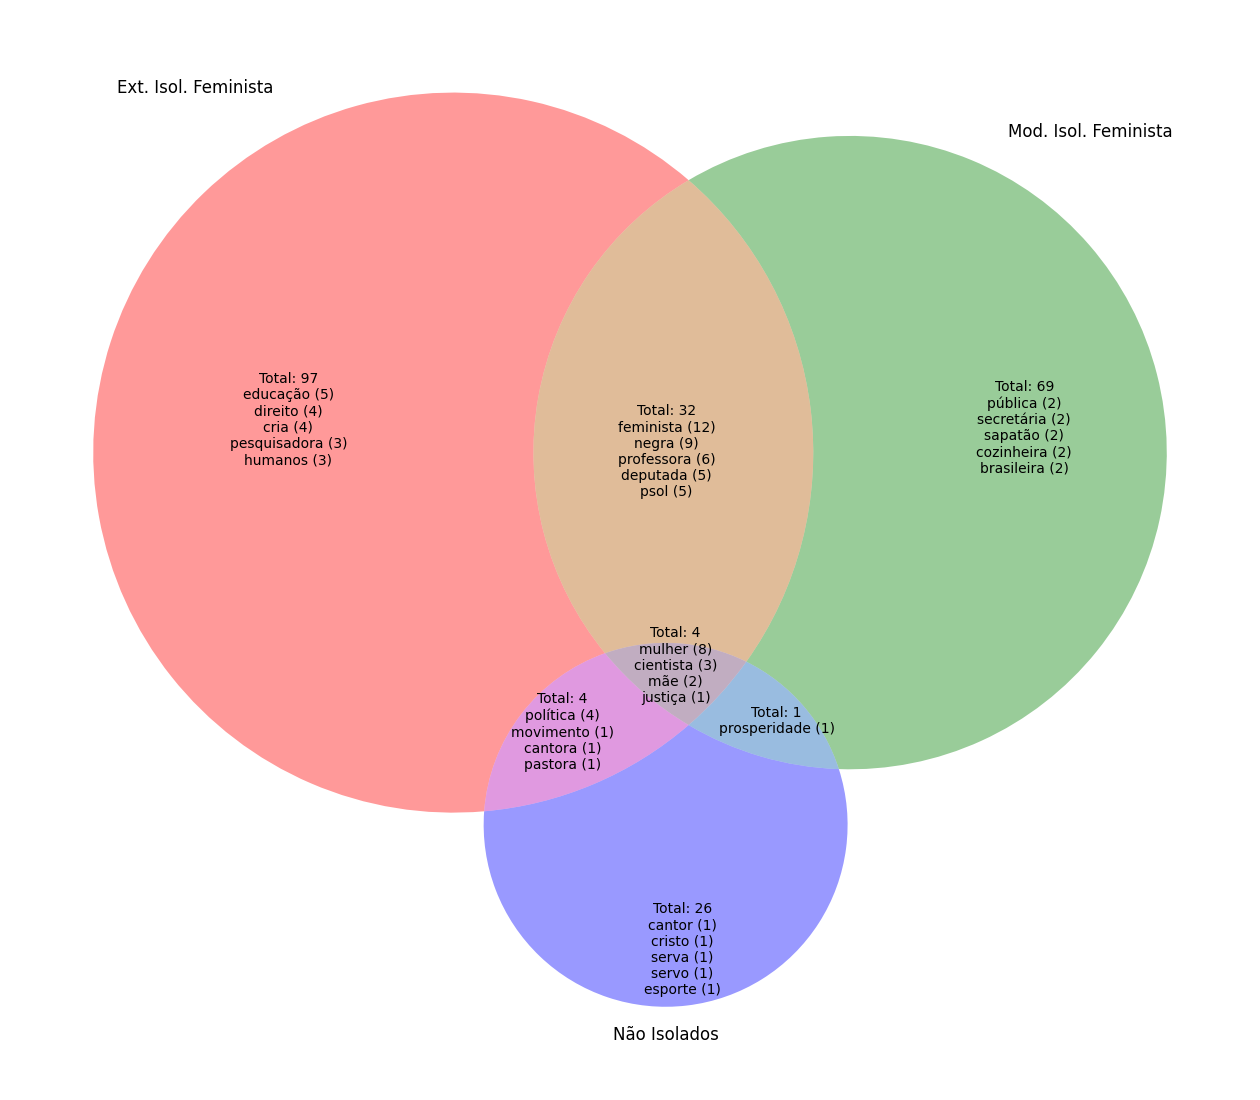

In [18]:
# O que ha em comum entre as feministas e o centro?

from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from matplotlib_venn import venn3
import matplotlib.pyplot as plt

# Usar CountVectorizer para contar a presença de palavras nas colunas de palavras-chave
vectorizer = CountVectorizer(binary=True)
X = vectorizer.fit_transform(influencers_infos['key_words_clean'])

# Criar um DataFrame com as palavras e suas frequências por ideologia
keywords_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out(), index=influencers_infos['ideology_classification_old'])

# Agrupar por classificação ideológica e somar as ocorrências
keywords_by_ideology = keywords_df.groupby('ideology_classification_old').sum()

# Exemplo para 3 faixas ideológicas: Feminista Extrema, Feminista Moderada, e Centro
set1 = set(keywords_by_ideology.columns[keywords_by_ideology.loc['feminista extrema'] > 0])
set2 = set(keywords_by_ideology.columns[keywords_by_ideology.loc['feminista moderada'] > 0])
set3 = set(keywords_by_ideology.columns[keywords_by_ideology.loc['centro'] > 0])

# Identificar palavras comuns e específicas
common_12 = set1 & set2
common_13 = set1 & set3
common_23 = set2 & set3
common_123 = set1 & set2 & set3

# Função para obter as top 5 palavras mais frequentes com suas frequências
def get_top_5_words_with_freq(words, group):
    words_list = list(words)  # Converter o conjunto para uma lista
    freq = keywords_by_ideology.loc[group, words_list].sort_values(ascending=False)
    return [f"{word} ({freq[word]})" for word in freq.index[:5]]

# Função para combinar as top 5 palavras com a contagem total
def get_label_text(words, group):
    top_5_words = get_top_5_words_with_freq(words, group)
    total_count = len(words)
    return f"Total: {total_count}\n" + "\n".join(top_5_words)

# Criar o gráfico de Venn
plt.figure(figsize=(16, 16))  # Aumentar o tamanho da figura
venn = venn3([set1, set2, set3], ('Ext. Isol. Feminista', 'Mod. Isol. Feminista', 'Não Isolados'))

# Customizar os rótulos para mostrar as top 5 palavras com suas frequências e o total de palavras
venn.get_label_by_id('100').set_text(get_label_text(set1 - common_12 - common_13, 'feminista extrema'))
venn.get_label_by_id('010').set_text(get_label_text(set2 - common_12 - common_23, 'feminista moderada'))
venn.get_label_by_id('001').set_text(get_label_text(set3 - common_13 - common_23, 'centro'))
venn.get_label_by_id('110').set_text(get_label_text(common_12 - common_123, 'feminista extrema'))
venn.get_label_by_id('101').set_text(get_label_text(common_13 - common_123, 'feminista extrema'))
venn.get_label_by_id('011').set_text(get_label_text(common_23 - common_123, 'feminista moderada'))
venn.get_label_by_id('111').set_text(get_label_text(common_123, 'feminista extrema'))

plt.show()


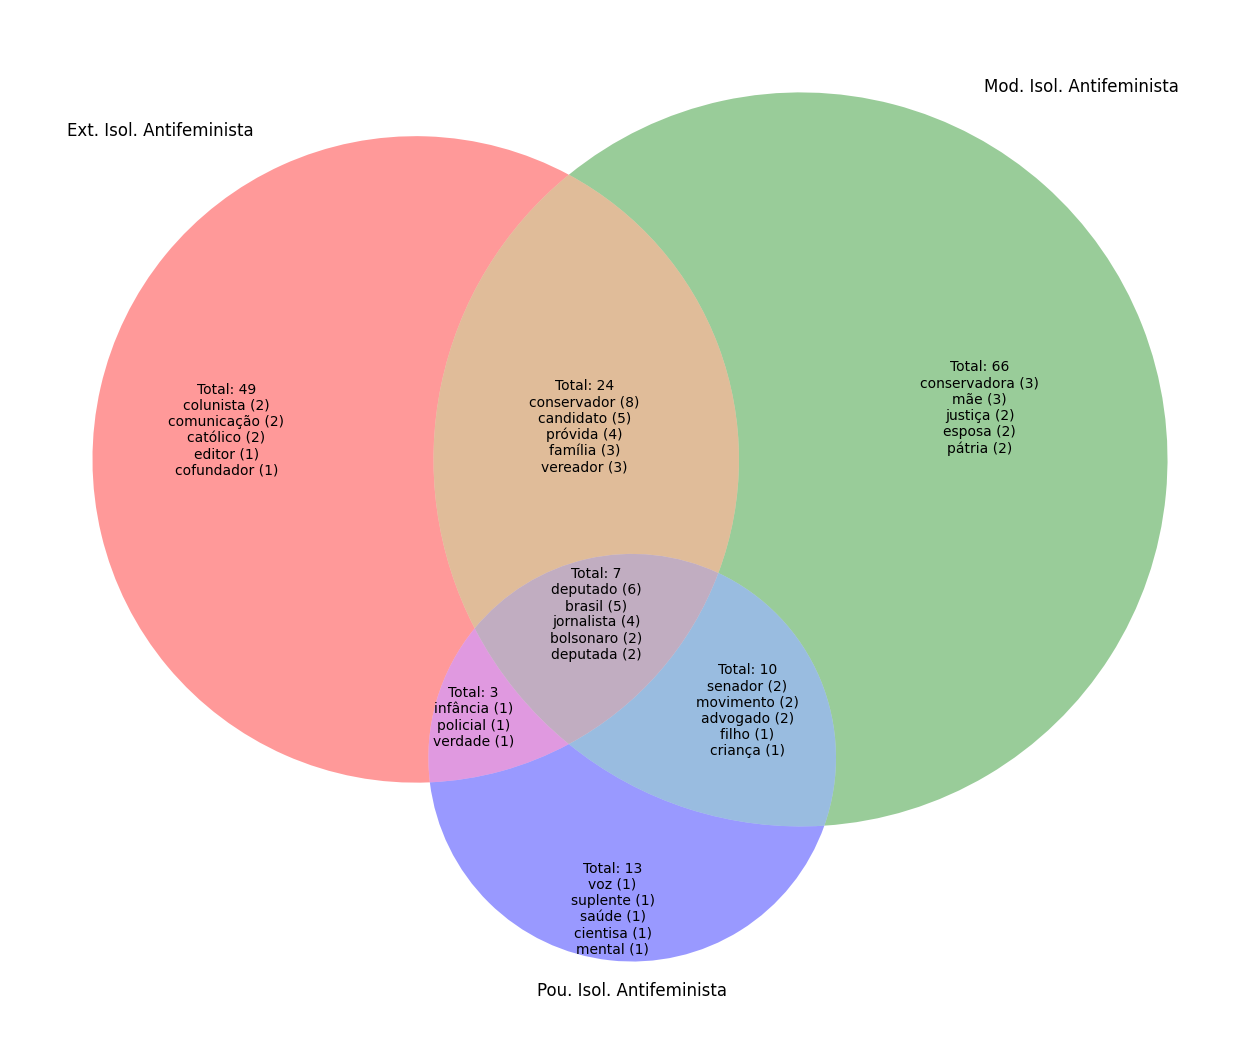

In [ ]:
# O que ha em comum entre antifeministas?

from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from matplotlib_venn import venn3
import matplotlib.pyplot as plt

# Usar CountVectorizer para contar a presença de palavras nas colunas de palavras-chave
vectorizer = CountVectorizer(binary=True)
X = vectorizer.fit_transform(influencers_infos['key_words_clean'])

# Criar um DataFrame com as palavras e suas frequências por ideologia
keywords_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out(), index=influencers_infos['ideology_classification_old'])

# Agrupar por classificação ideológica e somar as ocorrências
keywords_by_ideology = keywords_df.groupby('ideology_classification_old').sum()

# Exemplo para 3 faixas ideológicas: Feminista Extrema, Feminista Moderada, e Centro
set1 = set(keywords_by_ideology.columns[keywords_by_ideology.loc['antifeminista extrema'] > 0])
set2 = set(keywords_by_ideology.columns[keywords_by_ideology.loc['antifeminista moderada'] > 0])
set3 = set(keywords_by_ideology.columns[keywords_by_ideology.loc['antifeminista centro'] > 0])

# Identificar palavras comuns e específicas
common_12 = set1 & set2
common_13 = set1 & set3
common_23 = set2 & set3
common_123 = set1 & set2 & set3

# Função para obter as top 5 palavras mais frequentes com suas frequências
def get_top_5_words_with_freq(words, group):
    words_list = list(words)  # Converter o conjunto para uma lista
    freq = keywords_by_ideology.loc[group, words_list].sort_values(ascending=False)
    return [f"{word} ({freq[word]})" for word in freq.index[:5]]

# Função para combinar as top 5 palavras com a contagem total
def get_label_text(words, group):
    top_5_words = get_top_5_words_with_freq(words, group)
    total_count = len(words)
    return f"Total: {total_count}\n" + "\n".join(top_5_words)

# Criar o gráfico de Venn
plt.figure(figsize=(16, 16))  # Aumentar o tamanho da figura
venn = venn3([set1, set2, set3], ('Ext. Isol. Antifeminista', 'Mod. Isol. Antifeminista', 'Pou. Isol. Antifeminista'))

# Customizar os rótulos para mostrar as top 5 palavras com suas frequências e o total de palavras
venn.get_label_by_id('100').set_text(get_label_text(set1 - common_12 - common_13, 'antifeminista extrema'))
venn.get_label_by_id('010').set_text(get_label_text(set2 - common_12 - common_23, 'antifeminista moderada'))
venn.get_label_by_id('001').set_text(get_label_text(set3 - common_13 - common_23, 'antifeminista centro'))
venn.get_label_by_id('110').set_text(get_label_text(common_12 - common_123, 'antifeminista extrema'))
venn.get_label_by_id('101').set_text(get_label_text(common_13 - common_123, 'antifeminista extrema'))
venn.get_label_by_id('011').set_text(get_label_text(common_23 - common_123, 'antifeminista moderada'))
venn.get_label_by_id('111').set_text(get_label_text(common_123, 'antifeminista extrema'))

plt.show()


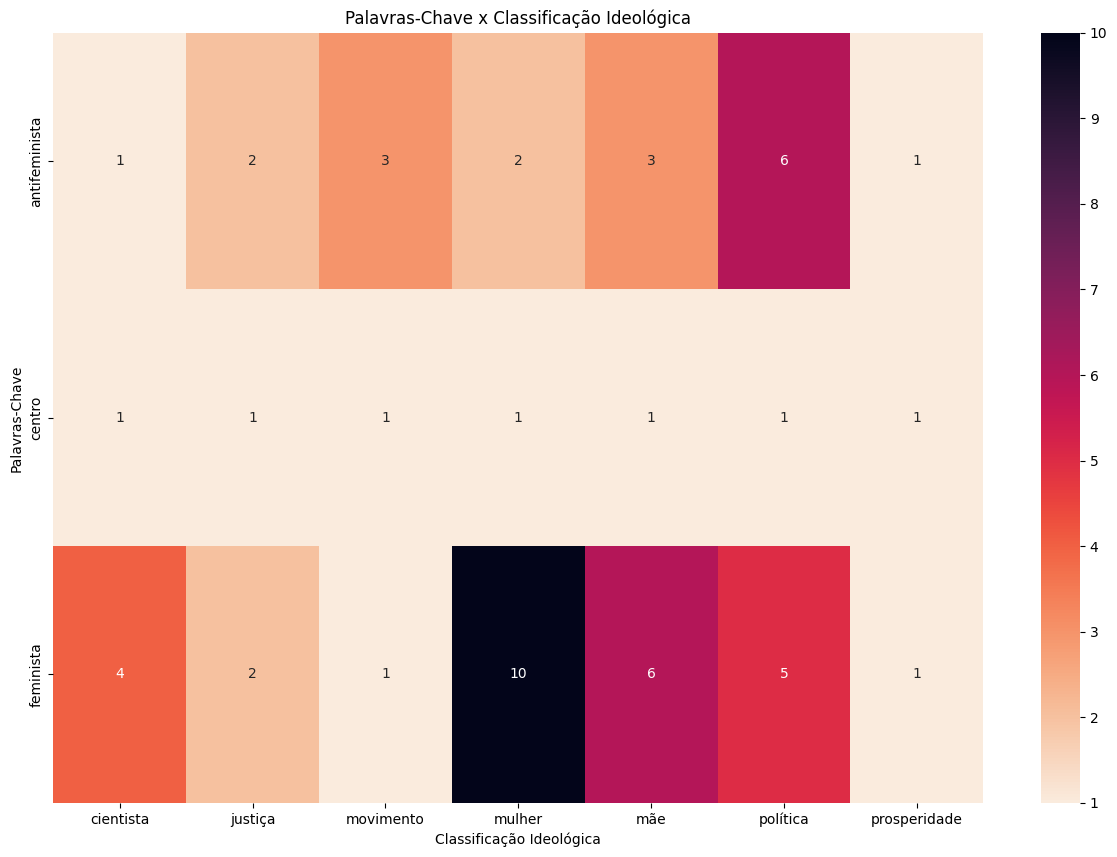

In [ ]:
# Palavras-Chave x Classificação Ideológica

from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Passo 1: Vetorizar as palavras-chave
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(influencers_infos['key_words_clean'].fillna(''))

# Passo 2: Criar um DataFrame das palavras-chave com as ideologias como índice
keywords_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out(), index=influencers_infos['ideology_classification_gen'])

# Passo 3: Agrupar as frequências das palavras-chave por ideologia
keywords_by_ideology = keywords_df.groupby('ideology_classification_gen').sum()

# Passo 4: Filtrar palavras-chave que aparecem em pelo menos um determinado número de registros
min_occurrence = 3
keywords_filtered = keywords_by_ideology.loc[:, (keywords_by_ideology > 0).sum(axis=0) >= min_occurrence]

# Verificar se a matriz não está vazia antes de criar o heatmap
if not keywords_filtered.empty:
    # Passo 5: Criar um heatmap para visualizar a distribuição das palavras-chave por ideologia
    plt.figure(figsize=(15, 10))
    sns.heatmap(keywords_filtered, cmap="rocket_r", annot=True, fmt="d")
    plt.title("Palavras-Chave x Classificação Ideológica")
    plt.xlabel("Classificação Ideológica")
    plt.ylabel("Palavras-Chave")
    plt.show()
else:
    print("Nenhuma palavra-chave suficiente para criar o heatmap após a filtragem.")


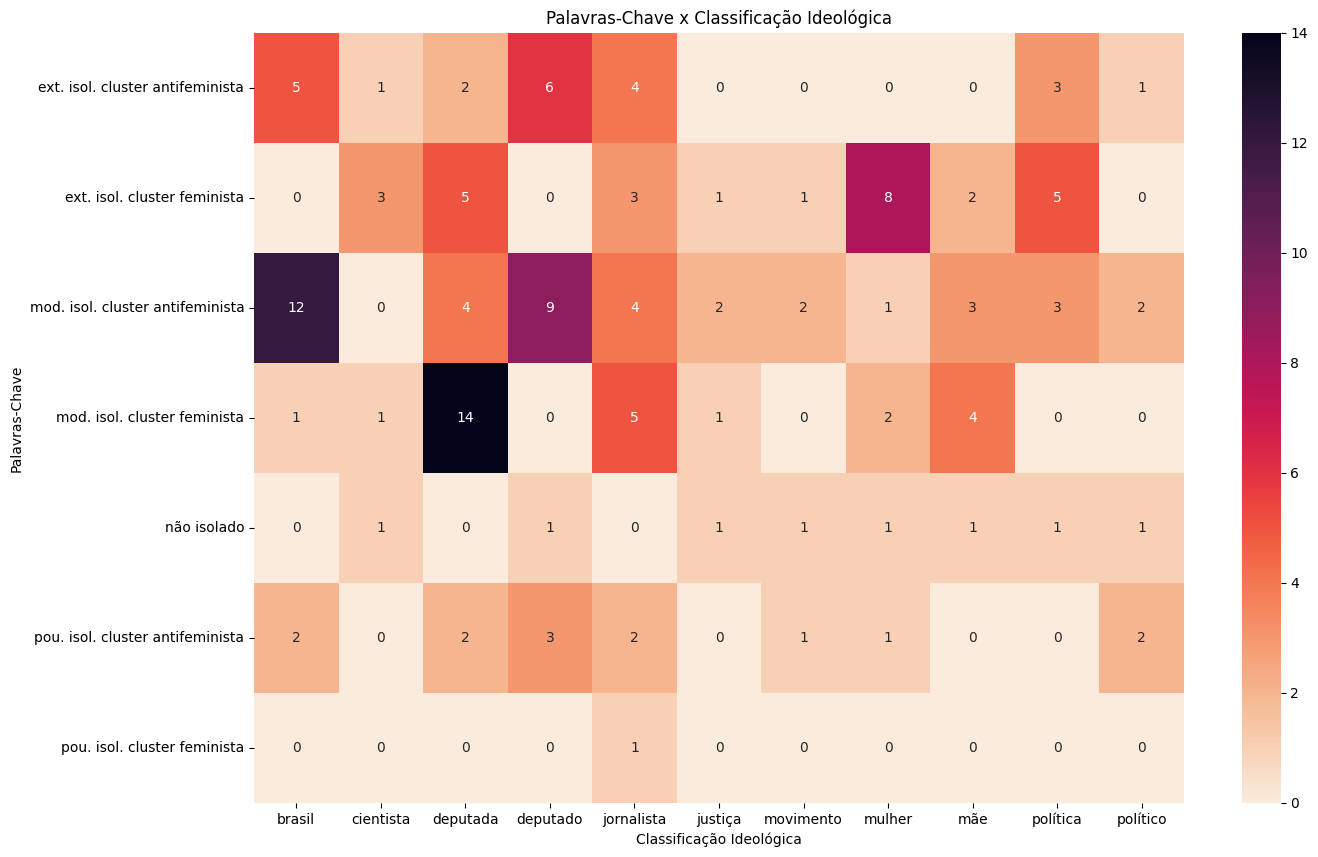

In [ ]:
# Palavras-Chave x Classificação Ideológica

from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Passo 1: Vetorizar as palavras-chave
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(influencers_infos['key_words_clean'].fillna(''))

# Passo 2: Criar um DataFrame das palavras-chave com as ideologias como índice
keywords_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out(), index=influencers_infos['ideology_classification'])

# Passo 3: Agrupar as frequências das palavras-chave por ideologia
keywords_by_ideology = keywords_df.groupby('ideology_classification').sum()

# Passo 4: Filtrar palavras-chave que aparecem em pelo menos um determinado número de registros
min_occurrence = 4
keywords_filtered = keywords_by_ideology.loc[:, (keywords_by_ideology > 0).sum(axis=0) >= min_occurrence]

# Verificar se a matriz não está vazia antes de criar o heatmap
if not keywords_filtered.empty:
    # Passo 5: Criar um heatmap para visualizar a distribuição das palavras-chave por ideologia
    plt.figure(figsize=(15, 10))
    sns.heatmap(keywords_filtered, cmap="rocket_r", annot=True, fmt="d")
    plt.title("Palavras-Chave x Classificação Ideológica")
    plt.xlabel("Classificação Ideológica")
    plt.ylabel("Palavras-Chave")
    plt.show()
else:
    print("Nenhuma palavra-chave suficiente para criar o heatmap após a filtragem.")


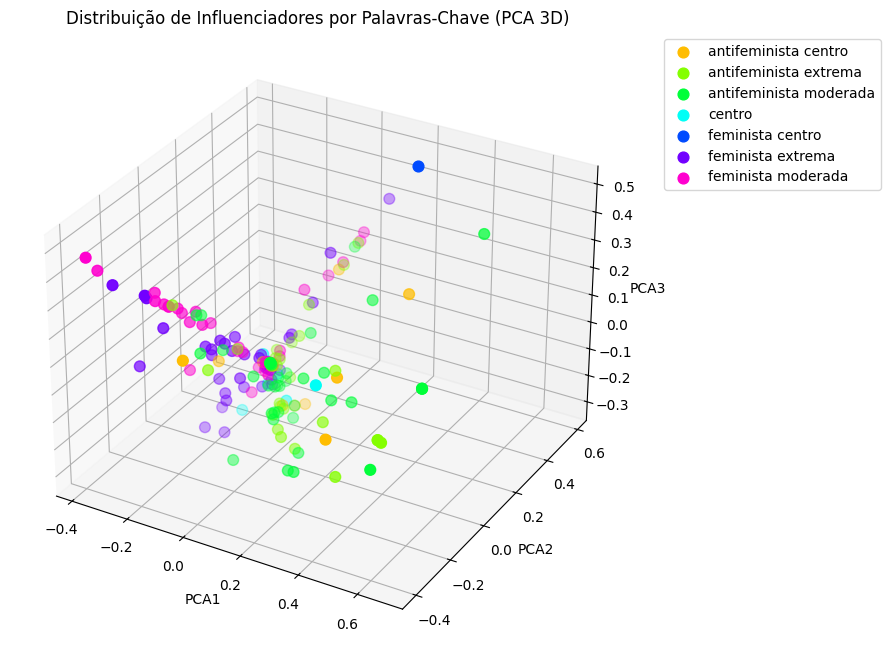

In [ ]:
# PCA 3D
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

# 1. Vetorização do texto usando TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(influencers_infos['key_words_clean'].fillna(''))

# Aplicar K-Means para agrupar os influenciadores
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X)

# Adicionar a coluna de clusters ao DataFrame original
influencers_infos['cluster'] = clusters

# 2. Aplicar PCA para reduzir a dimensionalidade para 3 componentes
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X.toarray())

# Criar um DataFrame para a visualização
pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2', 'PCA3'])
pca_df['ideology_classification'] = influencers_infos['ideology_classification']

# Visualização 3D com cores para ideologias
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Mapeamento de cores para as classificações ideológicas
colors = sns.color_palette("hsv", len(influencers_infos['ideology_classification'].unique()))

# Plotar cada ponto no gráfico 3D
for i, (name, group) in enumerate(pca_df.groupby('ideology_classification')):
    ax.scatter(
        group['PCA1'], 
        group['PCA2'], 
        group['PCA3'], 
        label=name, 
        color=colors[i], 
        s=60
    )

ax.set_title('Distribuição de Influenciadores por Palavras-Chave (PCA 3D)')
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [ ]:
# PCA 3D
import plotly.express as px
import pandas as pd

# PCA com 3 componentes
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X.toarray())

# Atualizar DataFrame com os 3 componentes
pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2', 'PCA3'])
pca_df['cluster'] = clusters
pca_df['ideology_classification'] = influencers_infos['ideology_classification']

# Visualização 3D com Plotly
fig = px.scatter_3d(
    pca_df, 
    x='PCA1', 
    y='PCA2', 
    z='PCA3', 
    color='cluster', 
    # color='ideology_classification', 
    # symbol='cluster', 
    title='Clustering de Influenciadores por Palavras-Chave (PCA 3D)',
    labels={'ideology_classification': 'Ideology', 'cluster': 'Cluster'}
)

fig.update_traces(marker=dict(size=5))
fig.show()


In [ ]:
# quem sao os "diferentoes" do cluster 1?

pca_df['nome'] = influencers_infos['nome']
pca_df['bio'] = influencers_infos['bio']
pca_df['key_words_clean'] = influencers_infos['key_words_clean']

pca_df[pca_df['cluster'] == 1]

PCA1      PCA2      PCA3  cluster ideology_classification  \
95   0.201736 -0.057505  0.001212        1                  centro   
105  0.374374  0.190963  0.244154        1    antifeminista centro   
106  0.300080 -0.098051  0.082273        1    antifeminista centro   
107  0.342684 -0.232021 -0.049667        1    antifeminista centro   
114  0.327367 -0.060350 -0.019712        1  antifeminista moderada   
122  0.604816  0.224430  0.504090        1  antifeminista moderada   
135  0.224616 -0.048092  0.048381        1  antifeminista moderada   
136  0.673883 -0.249572  0.244777        1  antifeminista moderada   
139  0.597244 -0.404367  0.028163        1  antifeminista moderada   
141  0.271714 -0.084206 -0.016358        1  antifeminista moderada   
143  0.168887 -0.074107  0.025338        1  antifeminista moderada   
144  0.284191  0.130631  0.228787        1  antifeminista moderada   
148  0.673883 -0.249572  0.244777        1  antifeminista moderada   
154  0.280910 -0.146774 -0.056440        1   antifeminista extrema   
161  0.609983 -0.367090  0.104820        1   antifeminista extrema   
167  0.570351 -0.318709  0.072633        1   antifeminista extrema   
171  0.570351 -0.318709  0.072633        1   antifeminista extrema   
173  0.277220 -0.069978  0.084023        1   antifeminista extrema   
183  0.426415 -0.314536 -0.107356        1   antifeminista extrema   

                                                   bio                   nome  \
95   🗳 Deputado Federal RJ 🏢 Engenheiro Civil 📝 Esc...       Marcelo Crivella   
105  🔸 Cientista político e jornalista 🔸 Deputado f...      Marcel van Hattem   
106  Médico Veterinário. 2 X Deputado Estadual 5 X ...         Onyx Lorenzoni   
107  -Deputado federal (PL-SP) mais votado da histó...      Eduardo Bolsonaro   
114  Deputado Federal 2019-2027; ex-Vice-líder do G...          JOSÉ MEDEIROS   
122  Paulo Eduardo Martins - Jornalista, ex-deputad...  Paulo Eduardo Martins   
135  Secretário da Segurança Pública do Estado de S...        Capitão Derrite   
136  Deputado Federal do PL reeleito por Santa Cata...         Daniel Freitas   
139  Deputado Federal mais votado do Ceará e pré-ca...        André Fernandes   
141  🔰 Deputado Federal PL/MG Bem aventurados os qu...           Junio Amaral   
143  👊🏼 Deputado Federal PL/PA 🇧🇷 Deus, Pátria, Fam...    Delegado Éder Mauro   
144  Deputado federal do PL-RS, vice-lider do PL, e...             Bibo Nunes   
148  Deputado Estadual mais votado e presidente do ...           Carmelo Neto   
154  Policial militar, Conservador, bacharelando em...        Daniel Silveira   
161  Deputado Estadual mais votado da história de M...           Bruno Engler   
167  Deputado Federal eleito por 158.495 mil flumin...         Otoni de Paula   
171  Deputado Federal reeleito pelo RJ / Pré-candid...           Carlos Jordy   
173  Deputado Federal pelo Paraná reeleito com 249....          Filipe Barros   
183  Pré-candidato a vereador por SP 🇧🇷 Ex-Deputado...         Douglas Garcia   

                                       key_words_clean  
95   deputado engenheiro civil escritor cantor comp...  
105              cientisa político jornalista deputado  
106                      veterinário deputado ministro  
107  deputado policial advogado filho bolsonaro brasil  
114                         deputado vicelíder senador  
122                                jornalista deputado  
135   secretário segurança pública deputado licenciado  
136                                           deputado  
139                 deputado prefeito brasil candidato  
141            deputado justiça cristão bíblia direita  
143  deputado deus pátria família liberdade líder b...  
144  deputado líder empresário jornalista comunicad...  
148                                           deputado  
154      policial militar conservador direito deputado  
161                                    deputado brasil  
167                        deputado prefeito candidato  
171               

Resposta: os deputados... Nao tem ninguem de feminista porque elas sao deputadAs, a palavra e diferente.

In [ ]:
# Outros graficos

import matplotlib.pyplot as plt
import seaborn as sns

simple_charts_df = influencers_infos[['nome', 'ideology_classification', 
                                      'estado', 'universidades', 'partido', 
                                      'genero_str', 'art_prod_str', 
                                      'polit_militan_str', 'jor_com_str', 'jus_str', 'mid_str', 
                                      'part_col_str', 'polic_militar_str', 'prof_str', 'saude_str', 
                                      'ciencia_str', 'emp_str', 'rel_str', 'federal', 
                                      'federal_str', 'puc', 'puc_str', 'estadual', 'estadual_str', 'militar', 
                                      'militar_str']].copy()


# Lista de colunas para gerar os gráficos
columns_to_plot = ['estado', 'universidades', 'partido', 'genero_str', 'art_prod_str', 
                   'polit_militan_str', 'jor_com_str', 'jus_str', 'mid_str', 
                   'part_col_str', 'polic_militar_str', 'prof_str', 'saude_str', 
                   'ciencia_str', 'emp_str', 'rel_str', 'federal', 
                   'federal_str', 'puc', 'puc_str', 'estadual', 
                   'estadual_str', 'militar', 'militar_str']

# Dicionário de mapeamento de estados para regiões
state_to_region = {
    'AC': 'Norte', 'PA': 'Norte', 'MA': 'Norte',
    'SP': 'Sudeste', 'RJ': 'Sudeste', 'MG': 'Sudeste', 'ES': 'Sudeste',
    'RS': 'Sul', 'PR': 'Sul', 'SC': 'Sul',
    'BA': 'Nordeste', 'PE': 'Nordeste', 'RN': 'Nordeste', 'PB': 'Nordeste', 'CE': 'Nordeste',
    'DF': 'Centro-Oeste', 'GO': 'Centro-Oeste', 'MS': 'Centro-Oeste'
}

# Adicionar a coluna 'regiao' ao DataFrame
simple_charts_df['regiao'] = simple_charts_df['estado'].map(state_to_region)

# Ordem das ideologias da mais feminista para a mais antifeminista
ideology_order = [
    'feminista extrema',
    'feminista moderada',
    'feminista centro',
    'centro',
    'antifeminista centro',
    'antifeminista moderada',
    'antifeminista extrema'
]

# Atualizar o DataFrame com essa ordem para manter o eixo Y consistente
simple_charts_df['ideology_classification'] = pd.Categorical(
    simple_charts_df['ideology_classification'], 
    categories=ideology_order, 
    ordered=True
)


In [ ]:
# Regiao

import plotly.graph_objects as go
from plotly.subplots import make_subplots

def plot_subplots_for_column(df, column_name, name=''):
    if not name:
        name = column_name

    # Obter os valores únicos da coluna
    unique_values = df[column_name].dropna().unique()
    
    # Definir número de colunas e calcular o número de linhas necessárias
    cols = 3
    rows = (len(unique_values) + cols - 1) // cols  # arredondar para cima o número de linhas
    
    # Criar subplots com número de linhas e colunas definido
    fig = make_subplots(rows=rows, cols=cols, 
                        shared_xaxes=True, 
                        shared_yaxes=False,  # Não compartilhar Y para mostrar em todos os subgráficos
                        vertical_spacing=0.1,
                        horizontal_spacing=0.1,
                        subplot_titles=[f"{val}" for val in unique_values])

    # Calcular o valor máximo do eixo X para ser consistente em todos os subplots
    max_count = df.groupby(column_name)['ideology_classification'].value_counts().max() + 2

    # Adicionar um gráfico de barras para cada valor único na coluna
    for i, val in enumerate(unique_values):
        filtered_df = df[df[column_name] == val]
        counts = filtered_df['ideology_classification'].value_counts().reindex(ideology_order).fillna(0)

        # Calcular a posição do subplot
        row = (i // cols) + 1
        col = (i % cols) + 1

        fig.add_trace(go.Bar(
            y=counts.index,
            x=counts.values,
            orientation='h',
            name=val,
            text=counts.values,
            textposition='outside'  # Posicionar os valores de texto fora das barras
        ), row=row, col=col)
    
    # Atualizar layout para manter os eixos constantes
    fig.update_layout(
        height=300 * rows,  # Ajustar altura para comportar os subplots
        title_text=f"Distribuição de Ideologias por {name.capitalize()}",
        showlegend=False,
    )
    
    # Definir o range do eixo X para cada eixo individualmente
    for i in range(1, rows + 1):
        for j in range(1, cols + 1):
            fig.update_xaxes(range=[0, max_count], row=i, col=j)  # Ajustar a escala do eixo X para ser constante em todos os subplots
    
    fig.show()

# Exemplo de uso para gerar os gráficos para qualquer coluna, como 'regiao', 'estado', 'universidades', etc.
plot_subplots_for_column(simple_charts_df, 'regiao')

In [ ]:
# Genero

plot_subplots_for_column(simple_charts_df, 'genero_str', 'Genero')

In [ ]:
# Partidos

plot_subplots_for_column(simple_charts_df, 'partido')

In [ ]:
# Partidos - Orientacao

partido_orientacao = {
    'PSOL': 'esquerda',
    'PCdoB': 'esquerda',
    'PCB': 'esquerda',
    'PT': 'esquerda',
    'Democratas': 'direita',
    'Patriota': 'direita',
    'Republicanos': 'direita',
    'PSD': 'direita',
    'PSL': 'direita',
    'Avante': 'direita',
    'PL': 'direita',
    'NOVO': 'direita',
    'PSDB': 'direita',
    'Podemos': 'direita',
    'Progressistas': 'direita',
    'PSC': 'direita',
    'PRTB': 'direita',
    'PTB': 'direita'
}

simple_charts_df['partido_orientacao'] = simple_charts_df['partido'].map(partido_orientacao)

plot_subplots_for_column(simple_charts_df, 'partido_orientacao')


In [ ]:
# Graficos de valor unico

import plotly.graph_objects as go

def plot_single_bar_for_column(df, column_name, value):
    filtered_df = df[df[column_name] == value]
    
    # Calcular as contagens das classificações ideológicas
    counts = filtered_df['ideology_classification'].value_counts().reindex(ideology_order).fillna(0)
    
    # Calcular o valor máximo do eixo X para dimensionar o gráfico adequadamente
    max_count = counts.max()
    
    # Criar o gráfico de barras horizontal
    fig = go.Figure(go.Bar(
        y=counts.index,
        x=counts.values,
        orientation='h',
        text=counts.values,
        textposition='outside'  # Posicionar os valores de texto fora das barras
    ))
    
    # Atualizar layout para manter a aparência consistente com os subplots
    fig.update_layout(
        title_text=f"Distribuição de Ideologias para {value}",
        xaxis=dict(range=[0, max_count + 5]),  # Adicionar uma margem ao eixo X
        xaxis_title="Contagem",
        yaxis_title="Classificação Ideológica",
        height=400,
        xaxis_showgrid=True,  # Mostrar gridlines no eixo X
        yaxis_showgrid=True,  # Mostrar gridlines no eixo Y
        showlegend=False
    )
    
    fig.show()

columns_to_plot = ['art_prod_str', 'polit_militan_str', 'jor_com_str', 
                   'jus_str', 'mid_str', 'part_col_str', 'polic_militar_str', 
                   'prof_str', 'saude_str', 
                   'ciencia_str', 'emp_str', 'rel_str',
                   'federal_str', 'estadual_str', 'puc_str']

columns_to_plot_name = ['Artistas e Produtores', 'Políticos e Ativistas', 'Jornalistas e Comunicadores', 
                        'Trabalhadores da Justiça', 'Mídias', 'Partidos e Coletivos', 'Policiais e Militares', 
                        'Professores, Intelectuais e Escritores', 'Profissionais da Saúde', 
                        'Cientistas das Exatas e Engenheiros', 'Empresários', 'Líderes Religiosos', 
                        'Federais', 'Estaduais', 'PUC']

i = 0
for value in columns_to_plot:
    plot_single_bar_for_column(simple_charts_df, value, columns_to_plot_name[i])
    i+=1